In [5]:
#from google.colab import files
#files.upload()  # upload kaggle.json here


In [2]:
# Setup kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle API client
!pip install -q kaggle


In [4]:
!kaggle competitions download -c nfl-big-data-bowl-2021


 90% 361M/402M [00:00<00:00, 503MB/s]
100% 402M/402M [00:00<00:00, 520MB/s]


In [6]:
import zipfile
import os

# Define path to zip file and target extraction directory
zip_path = "/content/nfl-big-data-bowl-2021.zip"
extract_path = "/content/nfl_data/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)


['week5.csv',
 'week13.csv',
 'week17.csv',
 'week10.csv',
 'week15.csv',
 'week11.csv',
 'week14.csv',
 'week2.csv',
 'week7.csv',
 'week4.csv',
 'plays.csv',
 'week1.csv',
 'week16.csv',
 'week8.csv',
 'games.csv',
 'players.csv',
 'week3.csv',
 'week12.csv',
 'week6.csv',
 'week9.csv']

In [8]:
# Load core datasets
plays = pd.read_csv("/content/nfl_data/plays.csv")
games = pd.read_csv("/content/nfl_data/games.csv")
players = pd.read_csv("/content/nfl_data/players.csv")

# Quick overview
print("plays:", plays.shape)
print("games:", games.shape)
print("players:", players.shape)

plays.head()


plays: (19239, 27)
games: (253, 6)
players: (1303, 7)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [9]:
week1 = pd.read_csv("/content/nfl_data/week1.csv")
week1.head()


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,NaN,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,NaN,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,NaN,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,NaN,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,NaN,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [10]:
import os
import pandas as pd

# List of all week CSVs
week_files = sorted([f for f in os.listdir("/content/nfl_data") if f.startswith("week")])

# Merge them into one DataFrame
tracking_data = pd.concat([pd.read_csv(f"/content/nfl_data/{file}") for file in week_files], ignore_index=True)

print(f"✅ Tracking data shape: {tracking_data.shape}")
tracking_data.head()


✅ Tracking data shape: (18309388, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,NaN,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,NaN,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,NaN,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,NaN,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,NaN,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


**Next Steps**
- **Determine Ball Carrier:**

  - We will find the player carrying the ball after event == "handoff".

  -  position == "HB" or RB.

  - Match is made with the relevant nflId, playId, and gameId.

**Feature Engineering:**

  - Carrier's speed, acceleration, and direction

  - Distance to nearest defender

  - Position at snap

**Modeling:**

  - Goal: playResult (how many yards were gained)

  - Model: LGBM / XGBoost / Neural Network

**Step by Step:**
1. Filter rows where event == 'handoff'.

2. The nflId in these rows is the carrier.

3. There should be only one ball carrier for each gameId and playId.

In [11]:
# Step 1: Filter handoff events
handoffs = tracking_data[tracking_data['event'] == 'handoff'].copy()

# Step 2: Keep only relevant columns
handoffs = handoffs[['gameId', 'playId', 'nflId', 'team', 'displayName', 'position', 'x', 'y', 's', 'a', 'dir']]

# Step 3: Rename for clarity
handoffs.rename(columns={
    'nflId': 'ball_carrier_id',
    'displayName': 'ball_carrier_name',
    'team': 'ball_carrier_team',
    'position': 'ball_carrier_position',
    'x': 'ball_carrier_x',
    'y': 'ball_carrier_y',
    's': 'ball_carrier_speed',
    'a': 'ball_carrier_acceleration',
    'dir': 'ball_carrier_direction'
}, inplace=True)

handoffs.head()


,gameId,playId,ball_carrier_id,ball_carrier_team,ball_carrier_name,ball_carrier_position,ball_carrier_x,ball_carrier_y,ball_carrier_speed,ball_carrier_acceleration,ball_carrier_direction
46514,2018090600,2736,2507763.0,home,Mike Wallace,WR,51.88,20.99,0.83,0.49,305.30
46515,2018090600,2736,2532842.0,home,Nick Foles,QB,56.84,30.02,1.54,2.67,64.45
46516,2018090600,2736,2539334.0,away,Desmond Trufant,CB,50.20,20.91,1.06,1.16,301.17
46517,2018090600,2736,2539653.0,away,Robert Alford,CB,50.02,11.99,2.85,4.20,347.06
46518,2018090600,2736,2540158.0,home,Zach Ertz,TE,53.86,23.41,2.34,0.73,175.82


In [12]:
handoffs.shape

(1889, 11)

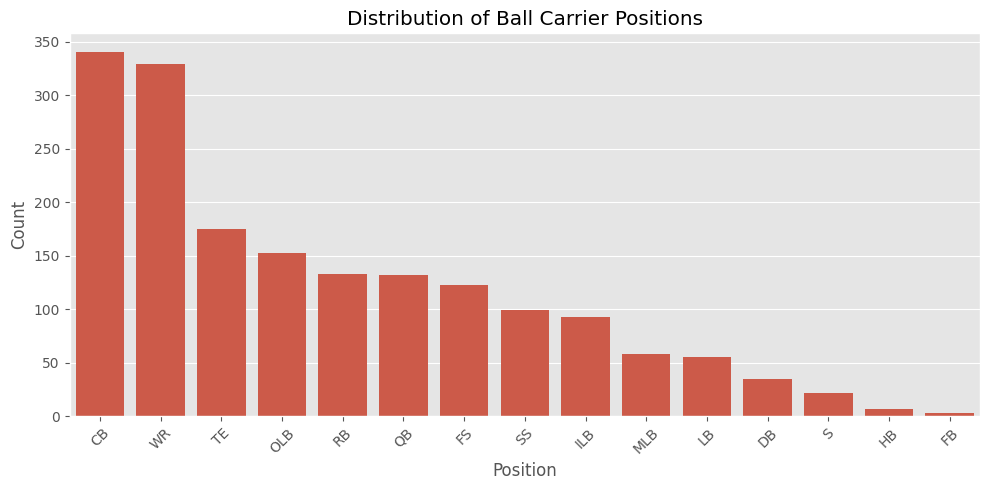

In [14]:
# EDA (Exploratory Data Analysis)

# Ball Carrier Position Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))

# Position distribution
sns.countplot(data=handoffs, x="ball_carrier_position", order=handoffs["ball_carrier_position"].value_counts().index)
plt.title("Distribution of Ball Carrier Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


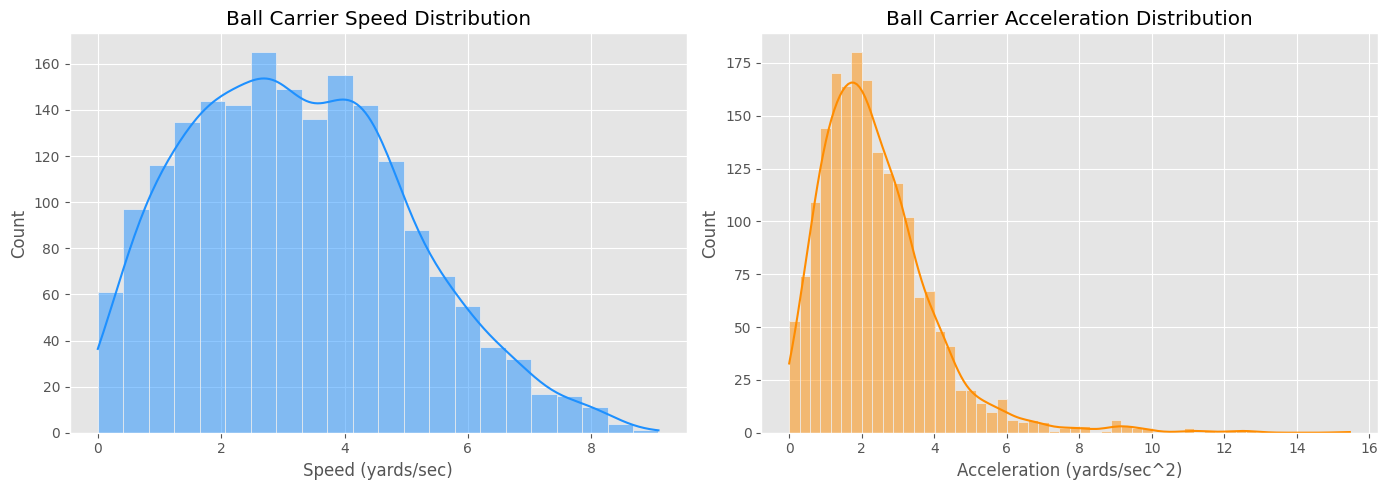

In [15]:
# Speed and acceleration histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(handoffs["ball_carrier_speed"], kde=True, ax=axes[0], color="dodgerblue")
axes[0].set_title("Ball Carrier Speed Distribution")
axes[0].set_xlabel("Speed (yards/sec)")

sns.histplot(handoffs["ball_carrier_acceleration"], kde=True, ax=axes[1], color="darkorange")
axes[1].set_title("Ball Carrier Acceleration Distribution")
axes[1].set_xlabel("Acceleration (yards/sec^2)")

plt.tight_layout()
plt.show()


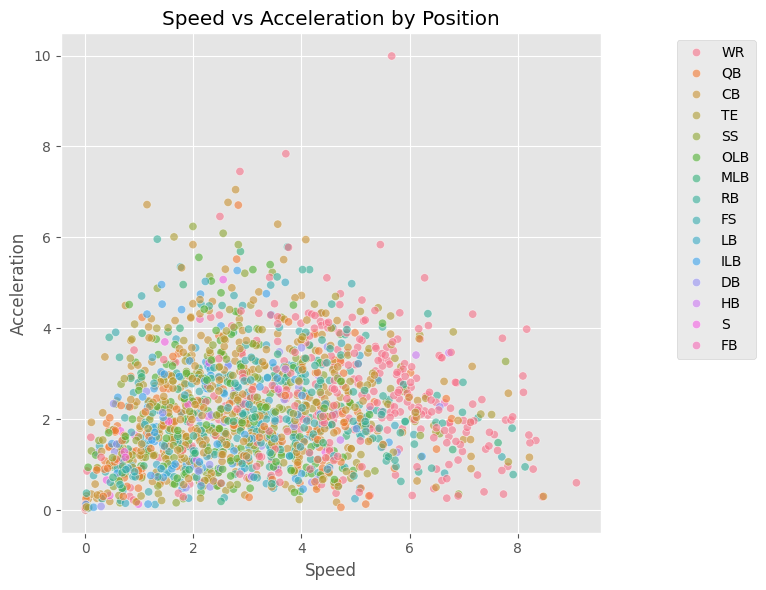

In [16]:
# Speed vs Acceleration Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=handoffs, x="ball_carrier_speed", y="ball_carrier_acceleration", hue="ball_carrier_position", alpha=0.6)
plt.title("Speed vs Acceleration by Position")
plt.xlabel("Speed")
plt.ylabel("Acceleration")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()


**Observations:**
- **Ball Carrier Position Distribution:**
  - Cornerback (CB) and Wide Receiver (WR) are the most common ball carriers.

  - TE (Tight End), Outside Linebacker (OLB), and Running Back (RB) are also highly represented.

- **Speed and Acceleration:**
  - Speed and acceleration distributions are right-tailed, approaching a bell curve.

  - There is generally a concentration of 2–5 yards/sec and 1–3 yards/sec² of acceleration.

- **Speed and Acceleration by Position:**
  - WRs stand out with their high speed and average acceleration.

  - CBs generally show a more balanced distribution.

  - Positions like QB and FB have lower speed and acceleration values.

/tmp/ipython-input-18-217022428.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_counts.index, y=success_counts.values, palette="crest")


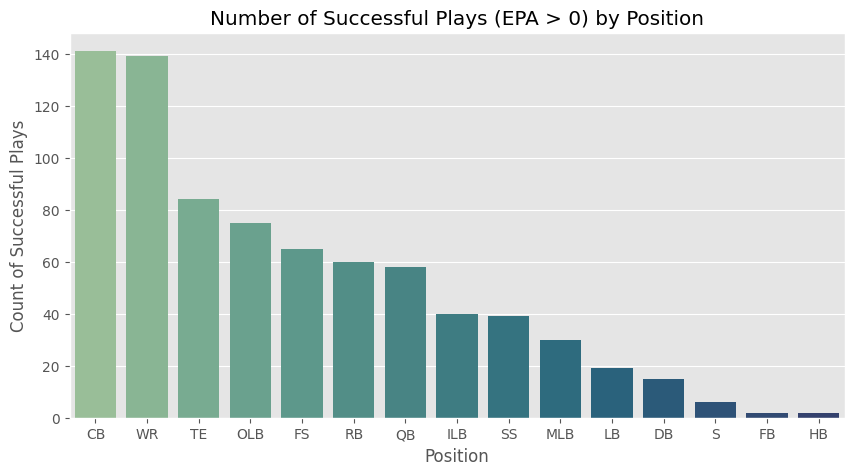

In [18]:
# Total Number of Successful Games (Positive EPA)

# Get EPA by combining handoffs and plays data
handoffs = handoffs.merge(plays[['gameId', 'playId', 'epa']], on=['gameId', 'playId'], how='left')

# Buy those with EPA > 0
successful_plays = handoffs[handoffs['epa'] > 0]

# Count the number of successful plays by position
success_counts = successful_plays['ball_carrier_position'].value_counts()

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=success_counts.index, y=success_counts.values, palette="crest")
plt.title("Number of Successful Plays (EPA > 0) by Position")
plt.xlabel("Position")
plt.ylabel("Count of Successful Plays")
plt.show()


/tmp/ipython-input-19-3484205725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_epa_by_position.index, y=mean_epa_by_position.values, palette='mako')


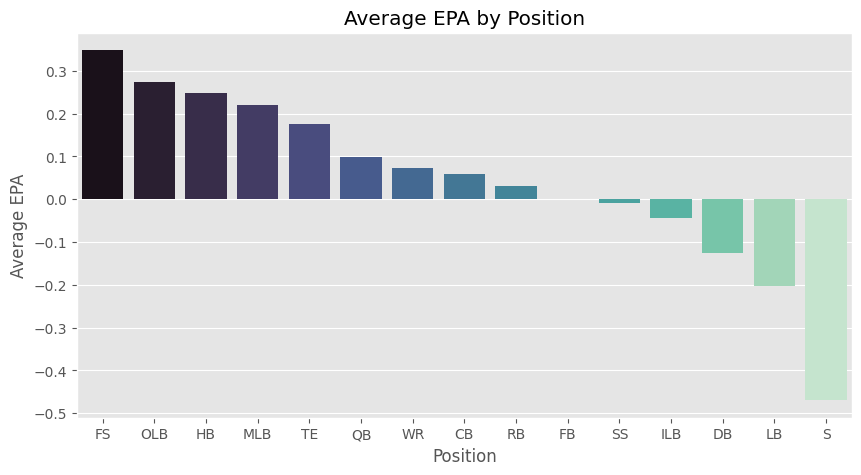

In [19]:
mean_epa_by_position = handoffs.groupby('ball_carrier_position')['epa'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=mean_epa_by_position.index, y=mean_epa_by_position.values, palette='mako')
plt.title("Average EPA by Position")
plt.xlabel("Position")
plt.ylabel("Average EPA")
plt.show()


/tmp/ipython-input-20-311803633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate.index, y=success_rate.values, palette='viridis')


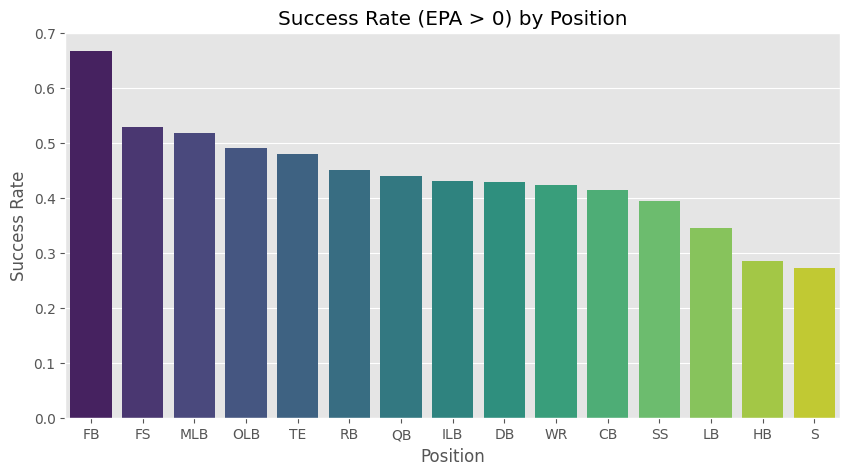

In [20]:
total_counts = handoffs['ball_carrier_position'].value_counts()
success_counts = handoffs[handoffs['epa'] > 0]['ball_carrier_position'].value_counts()
success_rate = (success_counts / total_counts).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=success_rate.index, y=success_rate.values, palette='viridis')
plt.title("Success Rate (EPA > 0) by Position")
plt.xlabel("Position")
plt.ylabel("Success Rate")
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Drop missing values in target
handoffs = handoffs.dropna(subset=["epa"])

# Select features and target
features = ["ball_carrier_speed", "ball_carrier_acceleration", "ball_carrier_x", "ball_carrier_y",
            "ball_carrier_direction", "ball_carrier_position"]
target = "epa"

# Separate X and y
X = handoffs[features]
y = handoffs[target]

# One-hot encode the categorical feature
X = pd.get_dummies(X, columns=["ball_carrier_position"], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 1.7572
R2 Score: -0.0334


In [25]:
# EPA Regression with XGBoost

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Feature / target split
handoffs_model = handoffs.select_dtypes(include=[np.number]).dropna(subset=["epa"])

# Features and target value
X = handoffs_model.drop(columns=['epa'])
y = handoffs_model['epa']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# XGBoost Regressor model definite
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Model fitting
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


RMSE: 0.2293
R2 Score: 0.9824


In [26]:
import pickle

with open('epa_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

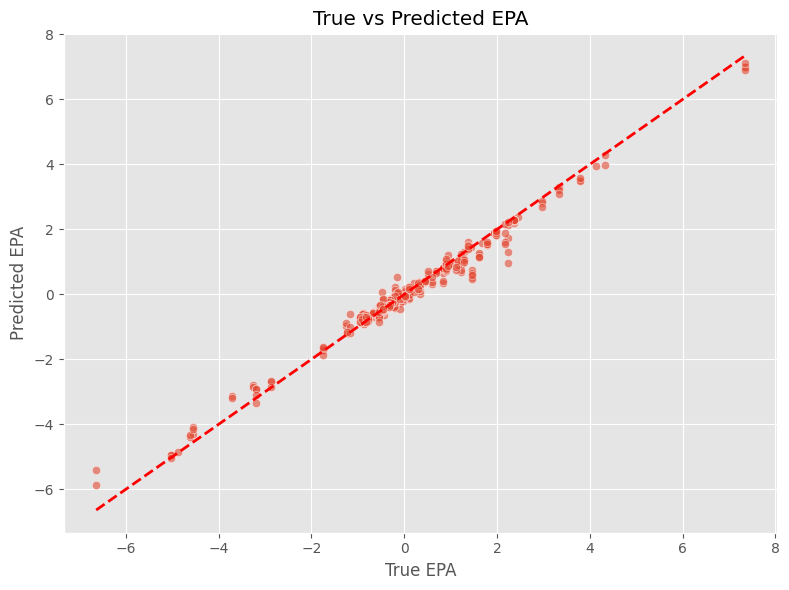

In [27]:
# Actual vs. Forecast Graph (Scatter Plot)

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

# Labels and title
plt.xlabel('True EPA')
plt.ylabel('Predicted EPA')
plt.title('True vs Predicted EPA')
plt.grid(True)
plt.tight_layout()
plt.show()


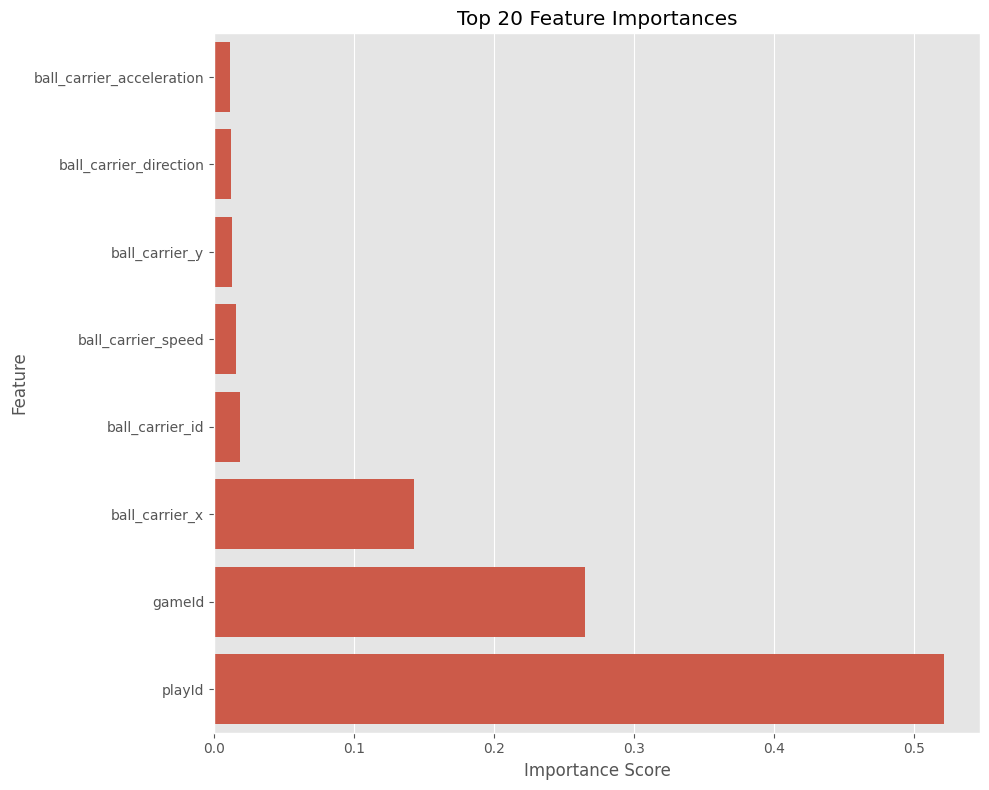

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode features
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance plot
importances = model.feature_importances_
feature_names = X_train.columns

# Plot top 20
top_indices = importances.argsort()[-20:]
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[top_indices], y=feature_names[top_indices])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
